# Motor Primitive Training



In [2]:
t1 = 1
t2 = 2
t3 = 3
t4 = 4
x = 5
y = 6
z = 7
st1 = 8
st2 = 9
st3 = 10
st4 = 11
lt1 = 12
lt2 = 13
lt3 = 14
lt4 = 15

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# Automatically reload external modules
%reload_ext autoreload
%autoreload 2
np.set_printoptions(suppress=True, precision=5)

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.tight_layout()
plt.rcParams['figure.figsize'] = [8,8]


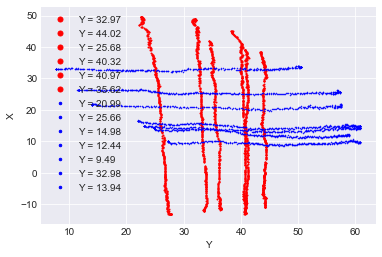

In [3]:

# Plot X-direction Motor Primitive in Euclidean space
for i in range(18,24):
    filename = 'DataFolder/Data/Line1/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.plot(A[:,y], A[:,x], 'r.', ms=2, label= 'Y = %.2f' %np.mean(A[:, y]))


# Plot Y-direction Motor Primitive in Euclidean space
for i in range(25,32):
    filename = 'DataFolder/Data/LineY/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.plot(A[:,y], A[:,x], 'b.', ms = 1, label= 'Y = %.2f' %np.mean(A[:, x]))


plt.legend(markerscale = 5)
plt.xlabel("Y")
plt.ylabel("X")
plt.show()


## View X axis Motor Primitives

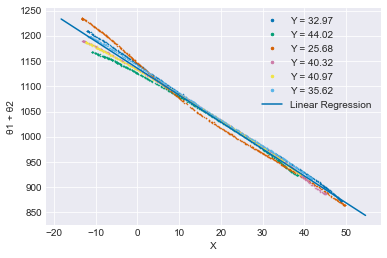

Linear Equation: (θ1 + θ2) = -5.3439414 * x + 1136.064
r2: 0.99191


In [23]:
grouped_x = []
grouped_y = []

for i in range(18,24):
    filename = 'DataFolder/Data/Line1/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    A[:,t1] = ((A[:,t1] + np.pi/2) * 195.442270117)+205
    A[:,t2] = ((A[:,t2]) * 195.442270117)+205
    plt.plot(A[:,x], A[:,t1] + A[:,t2] , '.', ms = 1, label= 'Y = %.2f' %np.mean(A[:, y]))
    grouped_x.extend(A[:,x])
    grouped_y.extend(A[:,t1] + A[:,t2])

grouped_y = np.asarray(grouped_y)
grouped_x = np.mat(grouped_x).T

A1 = np.hstack([grouped_x, np.ones([grouped_x.shape[0], 1])])
c, residues, rank, s = scipy.linalg.lstsq(A1, grouped_y)
r2 = 1 - residues / np.sum((grouped_y - grouped_y.mean())**2)

line_x = np.linspace(grouped_x.min()-5, grouped_x.max()+5, 100)
line_y = line_x * c[0] + c[1]
plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("θ1 + θ2")
plt.show()

print ("Linear Equation: (θ1 + θ2) = %0.7f * x + %0.3f" % (c[0], c[1]))
print ("r2: %0.5f" % r2)

## Determine θ2 ~ x,y

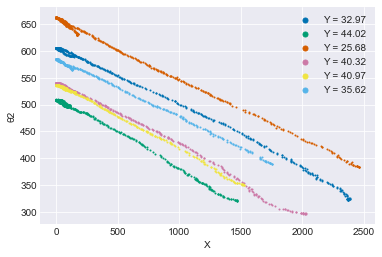

Linear Equation: θ2 = -0.1240340 * x **2 + -8.7340980 * y + 897.6556339
r2: 0.99400


In [24]:
grouped_x = []
grouped_y = []
grouped_alt = []

for i in range(18,24):
    filename = 'DataFolder/Data/Line1/Line%03i.csv' % i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2)
    A[:,t2] = (A[:,t2] * 195.442270117)+205
    plt.scatter(A[:,x]**2, A[:,t2], s = 1, label= 'Y = %.2f' %np.mean(A[:, y]))
    grouped_x.extend(A[:,x]**2)
    grouped_y.extend(A[:,t2])
    grouped_alt.extend(A[:,y])

grouped_y = np.asarray(grouped_y)

A2 = np.hstack((np.mat((grouped_x, grouped_alt)).T , np.ones([len(grouped_x), 1])))
AAinv = np.linalg.inv( np.dot(A2.T, A2) )
result = scipy.linalg.lstsq(A2, grouped_y)
b = result[0]
N = grouped_y.shape[0]
C = b.shape[0]
df_e = N-C
df_r = C-1
error = grouped_y - np.dot(A2, b)
sse = np.dot(error.T, error) / df_e
stderr = np.sqrt( np.diagonal( sse[0, 0] * AAinv ) )
t = b.T / stderr
p = 2*(1 - stats.t.cdf(abs(t), df_e))
r2 = 1 - error.var() / grouped_y.var()

# line_x = np.linspace(grouped_x.min(), grouped_x.max(), 100)
# line_alt = np.linspace(grouped_alt.min(), grouped_alt.max(), 100)
# line_y = line_x * b[0] + line_alt * b[1] + b[2]
# plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("θ2")

plt.show()

print ("Linear Equation: θ2 = %0.7f * x **2 + %0.7f * y + %0.7f" % (b[0], b[1], b[2]))
print ("r2: %0.5f" % r2)

## View Y axis Motor Primitives

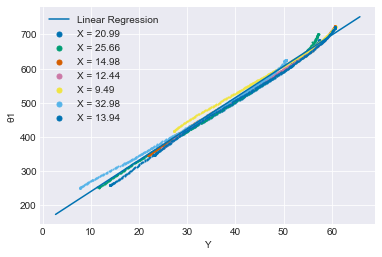

Linear Equation: θ1 = 9.1529305 * Y + 149.1745896
r2: 0.99276


In [25]:
grouped_x = []
grouped_y = []

for i in range(25,32):
    filename = 'DataFolder/Data/LineY/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    A[:,t1] = ((A[:,t1] + np.pi/2) * 195.442270117)+205
    plt.scatter(A[:,y], A[:,t1], s = 1, label= 'X = %.2f' %np.mean(A[:, x]))
    grouped_x.extend(A[:, y])
    grouped_y.extend(A[:,t1])

grouped_y = np.asarray(grouped_y)
grouped_x = np.mat(grouped_x).T

A3 = np.hstack([grouped_x, np.ones([grouped_x.shape[0], 1])])
c, residues, rank, s = scipy.linalg.lstsq(A3, grouped_y)
r2 = 1 - residues / np.sum((grouped_y - grouped_y.mean())**2)

line_x = np.linspace(grouped_x.min()-5, grouped_x.max()+5, 100)
line_y = line_x * c[0] + c[1]
plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("Y")
plt.ylabel("θ1")
plt.show()

print ("Linear Equation: θ1 = %0.7f * Y + %0.7f" % (c[0], c[1]))
print ("r2: %0.5f" % r2)

## Determine θ2 ~ x,y

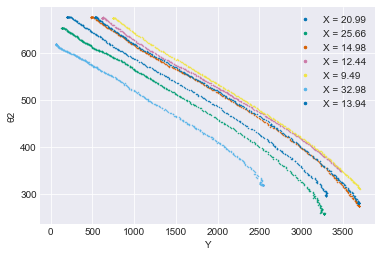

Linear Equation: θ2 = -0.1194068 * Y**2 + -5.8520929 * X + 828.9275838
r2: 0.99384


In [26]:
grouped_x = []
grouped_y = []
grouped_alt = []


for i in range(25,32):
    filename = 'DataFolder/Data/LineY/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    A[:,t2] = (A[:,t2] * 195.442270117)+205
    plt.plot(A[:,y]**2, A[:,t2], '.', ms = 1, label= 'X = %.2f' %np.mean(A[:, x]))
    grouped_x.extend(A[:,y]**2)
    grouped_y.extend(A[:,t2])
    grouped_alt.extend(A[:,x])

grouped_y = np.asarray(grouped_y)

A4 = np.hstack((np.mat((grouped_x, grouped_alt)).T , np.ones([len(grouped_x), 1])))
AAinv = np.linalg.inv( np.dot(A4.T, A4) )
result = scipy.linalg.lstsq(A4, grouped_y)
b = result[0]
N = grouped_y.shape[0]
C = b.shape[0]
df_e = N-C
df_r = C-1
error = grouped_y - np.dot(A4, b)
sse = np.dot(error.T, error) / df_e
stderr = np.sqrt( np.diagonal( sse[0, 0] * AAinv ) )
t = b.T / stderr
p = 2*(1 - stats.t.cdf(abs(t), df_e))
r2 = 1 - error.var() / grouped_y.var()

# line_x = np.linspace(grouped_x.min(), grouped_x.max(), 100)
# line_alt = np.linspace(grouped_alt.min(), grouped_alt.max(), 100)
# line_y = line_x * b[0] + line_alt * b[1] + b[2]
# plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("Y")
plt.ylabel("θ2")
plt.show()

print ("Linear Equation: θ2 = %0.7f * Y**2 + %0.7f * X + %0.7f" % (b[0], b[1], b[2]))
print ("r2: %0.5f" % r2)

## Experimenting with Motor Primitives

#### Motor Primitive I

The first set of motor primitives model the equations:
    
    For X : (θ1 + θ2) = -0.027x + 2.144
             θ2 = -0.044 * y + 3.146 * cos(0.00661375661π * x) + 0.395
        
    For Y :  θ1 = 0.046834 * Y - 1.856 
             θ2 = -0.03030x + 2.854 * cos(0.0071π * y) + 0.410

The first set of figures show the result of the first set of motor primitives when drawing a 10 x 10 cm square

In [ ]:
filename = 'DataFolder/Results/Residuals Plotted(old).csv'
A = pd.read_csv(filename)
plt.plot(A['PX'], A['PY'], '.', ms = 2, label= "Predicted Trajectory")
plt.plot(A['X'], A['Y'], '.', ms = 2, label= "Recorded Trajectory")
plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("Y")

fig, ax = plt.subplots(2, 2, sharex='col')
ax[0, 0].plot(A['PX'],label = "Predicted X Trajectory")
ax[0, 0].plot(A['X'], label = "Recorded X Trajectory")
ax[0, 0].set_ylabel("X")
ax[0, 0].legend(markerscale=4)

ax[1, 0].plot(A['PY'], label = "Predicted Y Trajectory")
ax[1, 0].plot(A['Y'], label = "Recorded Y Trajectory")
ax[1, 0].set_ylabel("Y")
ax[1, 0].legend(markerscale=4)

ax[0, 1].bar(range(0,A.shape[0]),A['Residual X'], label = "X Residual")
ax[0, 1].legend(markerscale=0)
ax[1, 1].bar(range(0,A.shape[0]),A['Residual Y'], label = "Y Residual")
ax[1, 1].legend(markerscale=0)
plt.show()

We see that the inaccuracy in the Y-motor primitive is seen in a volatile X trajectory. The primitive was influincing more than one direction.

#### Motor Primitive II

The second set of motor primitives model the equations:

    For X : (θ1 + θ2) = -0.027x + 2.144
             θ2 = -0.044 * y + 3.146 * cos(0.00661375661π * x) + 0.395    
             
    For Y :  θ1 = 0.046834 * Y - 1.856 
             θ2 = -1.009 * θ1 - 0.2810 * θ**2 - 0.02886 * x + 2.208

This step involved finding a more accurate solution for the θ2 solution in the Y motor primitive

In [ ]:
filename = 'DataFolder/Results/NewMotorPrim(4:1).csv'
A = pd.read_csv(filename)
plt.plot(A['X'], A['Y'], '.', ms = 2, label= "Predicted Trajectory")

plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
filename = 'DataFolder/Results/MotorPrimitiveIII.csv'
A = pd.read_csv(filename)
plt.plot(A['PX'], A['PY'], '.', ms = 2, label= "Target")
plt.plot(A['X'], A['Y'], '.', ms = 2, label= "Recorded Trajectory")
plt.plot(A['SX'], A['SY'], '.', ms = 2, label= "Simulated Trajectory")
plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("Y")

fig, ax = plt.subplots(2, 3, sharex='col')
ax[0, 0].plot(A['PX'],label = "Target X Trajectory")
# ax[0, 0].plot(A['SX'],label = "Simulation X Trajectory")
ax[0, 0].plot(A['X'], label = "Recorded X Trajectory")
ax[0, 0].set_ylabel("X")
# ax[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)

ax[1, 0].plot(A['PY'], label = "Target Y Trajectory")
# ax[0, 0].plot(A['SY'],label = "Simulated X Trajectory")
ax[1, 0].plot(A['Y'], label = "Recorded Y Trajectory")
ax[1, 0].set_ylabel("Y")
# ax[1, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)

# ax[0, 1].bar(range(0,A.shape[0]),A['RSX'], label = "X Simulated Residual")
ax[0, 2].bar(range(0,A.shape[0]),A['RPX'], label = "X Target")
ax[0, 2].set_ylim((-4,4))
ax[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
# ax[1, 1].bar(range(0,A.shape[0]),A['RSY'], label = "Y Simulated Residual")
ax[1, 2].bar(range(0,A.shape[0]),A['RPY'], label = "Y Target")
ax[1, 2].set_ylim((-2,2))
ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
plt.show()